In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', family='serif')

# Define the time intervals
time_intervals = np.linspace(1, 6, 6)  # Considering time intervals up to 6 units

# Sample data for utilization metrics
data = pd.read_csv('./fcfs-normal/all.csv')

# Define the range of groups
groups = [1, 2, 3, 4, 5, 6]

# Calculate the number of items in each group
items_per_group = [len(data[1:]) - sum(groups[i:]) for i in range(len(groups))]

# Calculate the mean values for each column and each group
group_means_dict = {}
for col in data.columns:
    if col != 'timestamp':  # Skip 'timestamp' column or any other non-numeric columns
        group_means = [
            data.loc[:items_per_group[i], col].mean() if i == 0
            else data.loc[items_per_group[i - 1]:items_per_group[i], col].mean()
            for i in range(len(groups))
        ]
        group_means_dict[col] = group_means

# Display the mean values for each column in each group
print(group_means_dict)
# Extract data columns from the DataFrame
cpu_util =  [data['cpu_util'][0]] + group_means_dict['cpu_util']
memory_utils = [data['memory_utils'][0]] + group_means_dict['memory_utils']
gpu_util = [data['gpu_util'][0]] +  group_means_dict['gpu_util']
gpu_memory_allocated = [data['gpu_memory_alloc'][0]] + group_means_dict['gpu_memory_alloc']
disk_util = [data['disk_util'][0]] + group_means_dict['disk_util']
# Plotting utilization metrics against time
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

plt.plot(cpu_util, linestyle='-', color='b', label='CPU Utilization')
plt.plot(memory_utils, linestyle='-', color='r', label='Memory Utils')
plt.plot(gpu_util, linestyle='-', color='g', label='GPU Utilization')
plt.plot(gpu_memory_allocated,  linestyle='-', color='m', label='GPU Memory Allocated')
plt.plot(disk_util, linestyle='-', color='c', label='Disk Utilization')

# Adding labels and title
plt.xlabel('Time (in second)')
plt.ylabel('Utilization (%)')
# plt.title('FCFS Hardware Metrics')

time = ['30', '60', '90', '120', '150 ', '180'] 
plt.xticks(time_intervals, time)

# Adding legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
# Setting y-axis limit to 100
plt.ylim(0, 100)

# Adding grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './fcfs-normal/all.csv'

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (7).

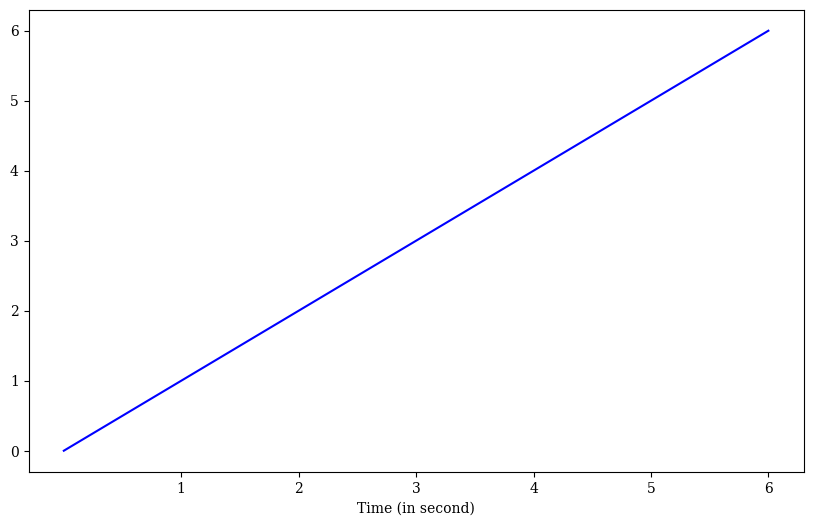

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', family='serif')

# Extract data columns from the DataFrame
request =  [0,1,2,3,4,5,6]
time_intervals = np.linspace(1, 6, 6) 
# Plotting utilization metrics against time
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

plt.plot(request, linestyle='-', color='b', label='Requests')
# Adding labels and title
plt.xlabel('Time (in second)')
plt.ylabel('')
# plt.title('FCFS Hardware Metrics')

time = ['0','30', '60', '90', '120', '150 ', '180'] 
plt.xticks(time_intervals, time)

# Adding legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
# Setting y-axis limit to 100
plt.ylim(0, 6)

# Adding grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
